In [1]:
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

### 1) Suno Research

In [2]:
with open('../crawlers/suno/data/results-todos.json', encoding='utf8') as json_file:
    data = json.load(json_file)

df_suno = pd.DataFrame(data)

In [3]:
# Convert date to datetime format
df_suno['date'] = pd.to_datetime(df_suno['date'], format='%d/%m/%Y %H:%M')

# Set date column as index
df_suno.set_index('date', inplace=True)

# Order by date
df_suno.sort_index(inplace=True)

In [4]:
df_suno.head()

,topic,title,link,tags
date,,,,
2020-11-27 18:01:00,Internacional,Bolsas mundiais fecham em alta; S&P 500 avança...,https://www.sunoresearch.com.br/noticias/bolsa...,"[bolsas mundiais, cac 40, Dax 30, FTSE 100, F..."
2020-11-27 18:20:00,Negócios,SUNO Notícias realiza live exclusiva com presi...,https://www.sunoresearch.com.br/noticias/suno-...,"[Wiz, WIZS3]"
2020-11-27 18:43:00,Imóveis,"IFIX fecha aos 2.811,53 pontos com alta de 0,40%",https://www.sunoresearch.com.br/noticias/ifix-...,"[cotação do ifix, FII, FIIs, fundo de investim..."
2020-11-27 18:47:00,Mercado,"Ibovespa fecha em alta de 0,32%, a 110.575,47 ...",https://www.sunoresearch.com.br/noticias/ibove...,"[cotação do ibovespa, ibovespa, Ibovespa hoje,..."
2020-11-27 19:04:00,Negócios,"Goldman Sachs eleva Renner (LREN3) para R$ 55,...",https://www.sunoresearch.com.br/noticias/goldm...,"[Lojas Renner, LREN3]"


In [5]:
df_suno.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 86 entries, 2020-11-27 18:01:00 to 2020-12-01 11:11:00
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   topic   86 non-null     object
 1   title   86 non-null     object
 2   link    86 non-null     object
 3   tags    86 non-null     object
dtypes: object(4)
memory usage: 3.4+ KB


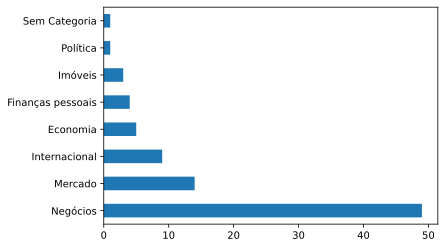

In [6]:
df_suno['topic'].value_counts().plot(kind='barh')

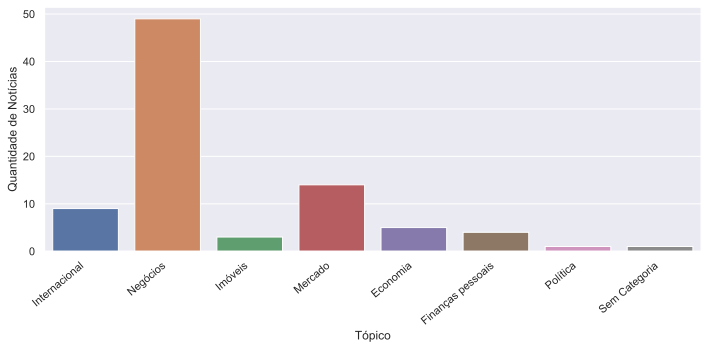

In [7]:
sns.set(style='darkgrid')

plt.figure(figsize=(10, 5))

ax = sns.countplot(df_suno['topic'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

plt.ylabel('Quantidade de Notícias')
plt.xlabel('Tópico')

plt.tight_layout()
plt.show()

In [8]:
df_suno['topic'].value_counts()

Negócios             49
Mercado              14
Internacional         9
Economia              5
Finanças pessoais     4
Imóveis               3
Política              1
Sem Categoria         1
Name: topic, dtype: int64

In [9]:
print ('Suno Research')

# Number of news per year (2020)
print('Notícias em 2020: {}'.format(df_suno.loc['2020-01-01':'2020-12-31'].shape[0]))

Suno Research
Notícias em 2020: 86


### 2) MoneyTimes

In [10]:
with open('../crawlers/money-times/data/results-todos.json', encoding='utf8') as json_file:
    data = json.load(json_file)

df_moneytimes = pd.DataFrame(data)

In [11]:
# Convert date to datetime format
df_moneytimes['date'] = pd.to_datetime(df_moneytimes['date'], format='%d/%m/%Y - %H:%M')

# Set date column as index
df_moneytimes.set_index('date', inplace=True)

# Order by date
df_moneytimes.sort_index(inplace=True)

In [12]:
df_moneytimes.head()

,topic,title,link,tags
date,,,,
2020-11-30 16:55:00,Eleições,"Para Maia, eleição municipal deu recado de que...",https://www.moneytimes.com.br/para-maia-eleica...,"[Eleições, João Doria, Palácio do Planalto, Re..."
2020-11-30 16:56:00,Staking,Corretora Coinbase anuncia planos para o lança...,https://www.moneytimes.com.br/corretora-coinba...,"[Blockchain, Corretora cripto, Criptoativos, C..."
2020-11-30 17:08:00,Política,Parlamento da Amazônia busca reativação com es...,https://www.moneytimes.com.br/parlamento-da-am...,"[Amazônia, Congresso, Hamilton Mourão, Interna..."
2020-11-30 17:13:00,Inovação,Banco estatal russo deseja criar plataforma pa...,https://www.moneytimes.com.br/banco-estatal-ru...,"[Bancos, Blockchain, Criptoativos, Criptomoeda..."
2020-11-30 17:18:00,Empresas,Fusões e aquisições globais se recuperam após ...,https://www.moneytimes.com.br/fusoes-e-aquisic...,"[Bloomberg, Empresas, Fusões & Aquisições, Int..."


In [13]:
df_moneytimes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 90 entries, 2020-11-30 16:55:00 to 2020-12-01 11:29:00
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   topic   90 non-null     object
 1   title   90 non-null     object
 2   link    90 non-null     object
 3   tags    90 non-null     object
dtypes: object(4)
memory usage: 3.5+ KB


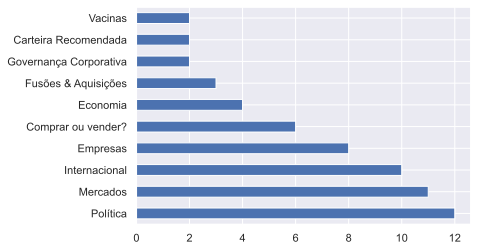

In [14]:
df_moneytimes['topic'].value_counts()[:10].plot(kind='barh')

In [15]:
print ('Money Times')

# Number of news per year (2020)
print('Notícias em 2020: {}'.format(df_moneytimes.loc['2020-01-01':'2020-12-31'].shape[0]))

Money Times
Notícias em 2020: 90


### 3) InfoMoney

In [16]:
with open('../crawlers/infomoney/data/results-infomoney.json', encoding='utf8') as json_file:
    data = json.load(json_file)

df_infomoney = pd.DataFrame(data)

In [17]:
def convert_month(full_date):
    
    m_list = ['jan', 'fev', 'mar', 'abr', 'maio', 'jun', 'jul', 'ago', 'set', 'out', 'nov', 'dez']
    
    for m in m_list:
        if m in full_date:
            full_date = full_date.replace(m, str(m_list.index(m) + 1))
            
    return full_date

In [18]:
df_infomoney['date'] = df_infomoney['date'].apply(convert_month)

# Convert date to datetime format
df_infomoney['date'] = pd.to_datetime(df_infomoney['date'], format='%d %m %Y %Hh%M', infer_datetime_format=True)

# Set date column as index
df_infomoney.set_index('date', inplace=True)

# Order by date
df_infomoney.sort_index(inplace=True)

In [19]:
df_infomoney.head()

,topic,title,link,tags
date,,,,
2020-11-27 18:10:00,mercados,Vale dá mais um passo para recuperar título de...,https://www.infomoney.com.br/mercados/vale-da-...,"[Mercados, Ações, Minério de Ferro, Vale]"
2020-11-27 18:20:00,mercados,Ação da Terra Santa salta 35% com potencial co...,https://www.infomoney.com.br/mercados/acao-da-...,"[Mercados, Ações, Klabin, OI, SLC Agrícola, Su..."
2020-11-27 18:30:00,mercados,"PIB, reunião da Opep e relatório de emprego no...",https://www.infomoney.com.br/mercados/pib-reun...,"[Economia, Mercados, Opep, Perspectivas, Petró..."
2020-11-27 18:32:00,mercados,"Ibovespa sobe 4,3% em sua quarta alta semanal ...",https://www.infomoney.com.br/mercados/ibovespa...,"[Mercados, Ações, Coronavírus, Dólar, Ibovespa..."
2020-11-27 18:59:00,mercados,"XP estuda fusão com Newco, companhia fruto da ...",https://www.infomoney.com.br/mercados/xp-estud...,"[Mercados, Fusões e Aquisições, Itaú Unibanco,..."


In [20]:
df_infomoney.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 90 entries, 2020-11-27 18:10:00 to 2020-12-01 11:03:00
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   topic   90 non-null     object
 1   title   90 non-null     object
 2   link    90 non-null     object
 3   tags    90 non-null     object
dtypes: object(4)
memory usage: 3.5+ KB


In [21]:
print ('InfoMoney')

# Number of news per year (2020)
print('Notícias em 2020: {}'.format(df_infomoney.loc['2020-01-01':'2020-12-31'].shape[0]))

InfoMoney
Notícias em 2020: 90


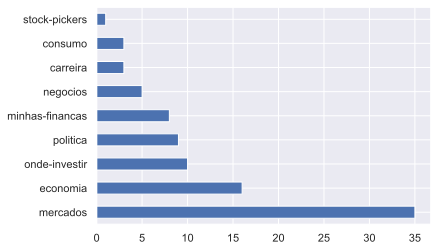

In [22]:
df_infomoney['topic'].value_counts()[:10].plot(kind='barh')

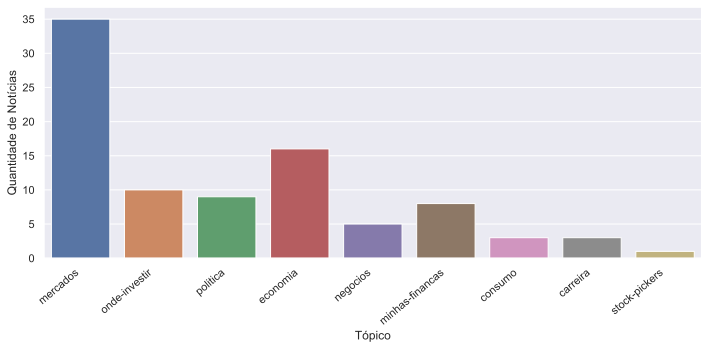

In [23]:
sns.set(style='darkgrid')

plt.figure(figsize=(10, 5))

ax = sns.countplot(df_infomoney['topic'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

plt.ylabel('Quantidade de Notícias')
plt.xlabel('Tópico')

plt.tight_layout()
plt.show()

---